# Импорт библиотек

In [22]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

# Функция Растригина

In [23]:
@njit
def f(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = len(x)
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result

# Реализация метода роя частиц на Python с использованием numba

In [24]:
@njit
def main(v_max: float):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        for k in range(dimension):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][0], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][0], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [25]:
list_of_all = main(1.9)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 0.003469633205700262 coordinates: [-0.00418208]
Размерности совпадают:  True


[ 0.52004123  5.11825478 -1.98927135  5.06679366 -0.7384718  -3.54551349
 -4.10822496 -1.531152   -0.9055738  -4.72119955  4.28488888 -2.87120754
 -2.35314025  4.06182034  4.52800413 -1.42721844 -4.37316499 -2.20663092
 -4.47728105 -0.14167573  0.69492528  3.35953545  0.44461543 -0.59689703
  3.3588849   1.0259748   2.1427461   3.75841477  4.25359578  4.35421537
 -0.76529187 -0.54544057  4.38798746 -0.02582015 -4.33371541  4.38903837
  1.85785621 -4.2963069   0.61342058 -0.60485836  4.54504565  3.5289948
  5.08896174  3.51760614  0.17937906  0.55591122  3.37906444 -2.90547158
  1.3002103  -0.90057498] 
 [2.01912649e+01 2.88322210e+01 1.54024709e+00 2.65401916e+01
 6.07219760e+00 6.03271618e-01 1.22814902e+01 1.63291600e+01
 9.95015269e-01 1.65780185e+01 3.05348907e+01 7.35829265e+00
 1.97750176e+01 1.72433313e+01 4.03484193e+01 2.00776418e+01
 1.64028228e+01 3.46963321e-03 9.78930473e+00 3.72731065e+00
 1.38747170e+01 2.76382011e+01 5.46670922e+00 1.49730713e+01
 2.76022065e+01 1.18550

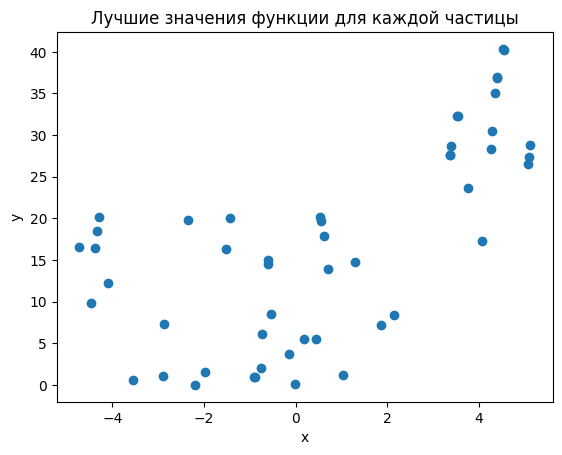

In [26]:
print(list_of_x, "\n", list_of_y)
plt.scatter(list_of_x, list_of_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

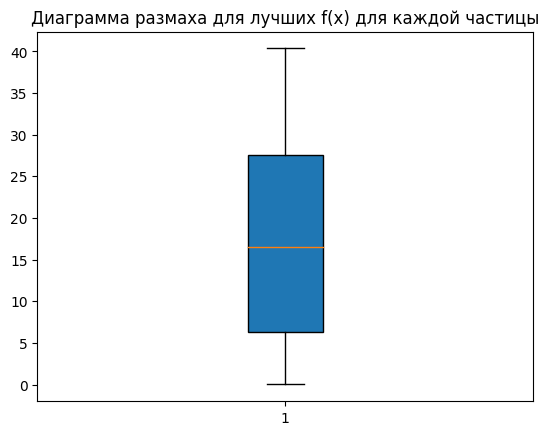

In [27]:
bp = plt.boxplot(list_of_y, patch_artist=True)  # диаграмма размаха для лучших f(x) для каждой частицы
plt.title("Диаграмма размаха для лучших f(x) для каждой частицы")
plt.show()

[ 0.52004123  0.52004123 -0.08927135 -0.08927135 -0.08927135  0.05542167
  0.05542167  0.05542167  0.05542167  0.05542167  0.05542167  0.05542167
  0.05542167  0.05542167  0.05542167  0.05542167  0.05542167 -0.00418208
 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208
 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208
 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208
 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208
 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208 -0.00418208
 -0.00418208 -0.00418208] 
 [2.01912649e+01 2.01912649e+01 1.54024709e+00 1.54024709e+00
 1.54024709e+00 6.03271618e-01 6.03271618e-01 6.03271618e-01
 6.03271618e-01 6.03271618e-01 6.03271618e-01 6.03271618e-01
 6.03271618e-01 6.03271618e-01 6.03271618e-01 6.03271618e-01
 6.03271618e-01 3.46963321e-03 3.46963321e-03 3.46963321e-03
 3.46963321e-03 3.46963321e-03 3.46963321e-03 3.46963321e-03
 3.46963321e-03 3.4696

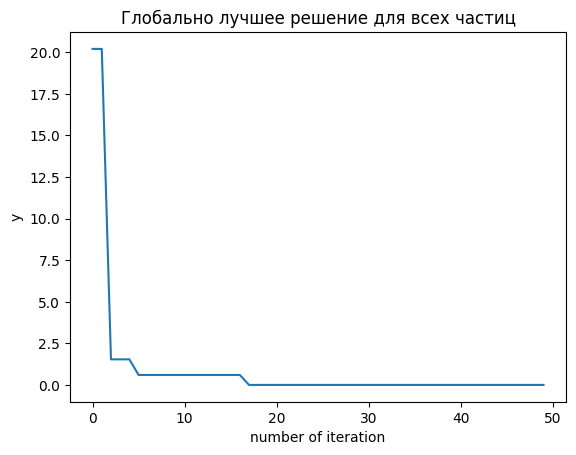

In [28]:
print(list_of_best_coord, "\n", list_of_best_solution)
plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution)
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()